In [1]:
import pandas as pd
import numpy as np # for data analysis

import seaborn as sns
import matplotlib.pyplot as plt # Data visualization

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score # Mchine learning and evaluation
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv (r"C:\Users\Lenovo\OneDrive\Desktop\Downloads\Customers SEGMENT  ML 2.csv")

In [3]:
data.head(2)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

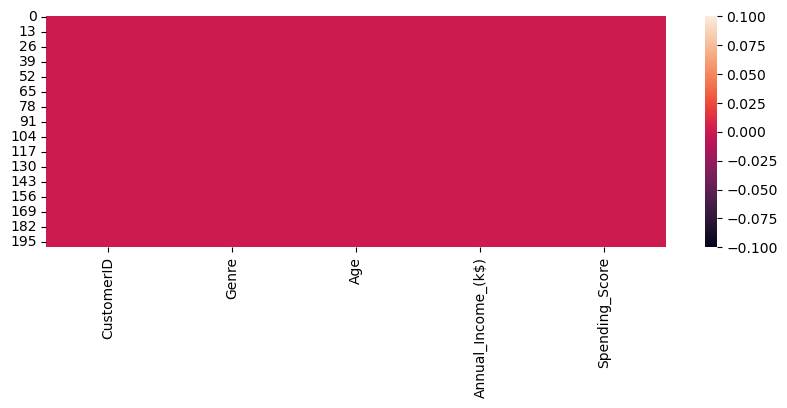

In [7]:
plt.figure(figsize=(10,3))
sns.heatmap(data.isna(), cbar= True);

In [8]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.describe(include=["object", "bool"])

,Genre
count,200
unique,2
top,Female
freq,112


### Data cleaning and preprocessing

In [11]:
data.duplicated().sum()

0

In [12]:
# Replace 'Genre' with 'Gender' in the 'Genre' column
data = data.rename(columns={'Genre': 'Gender'})

In [13]:
data.head(2)

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81


## EXPLANATORY DATA ANALYSIS

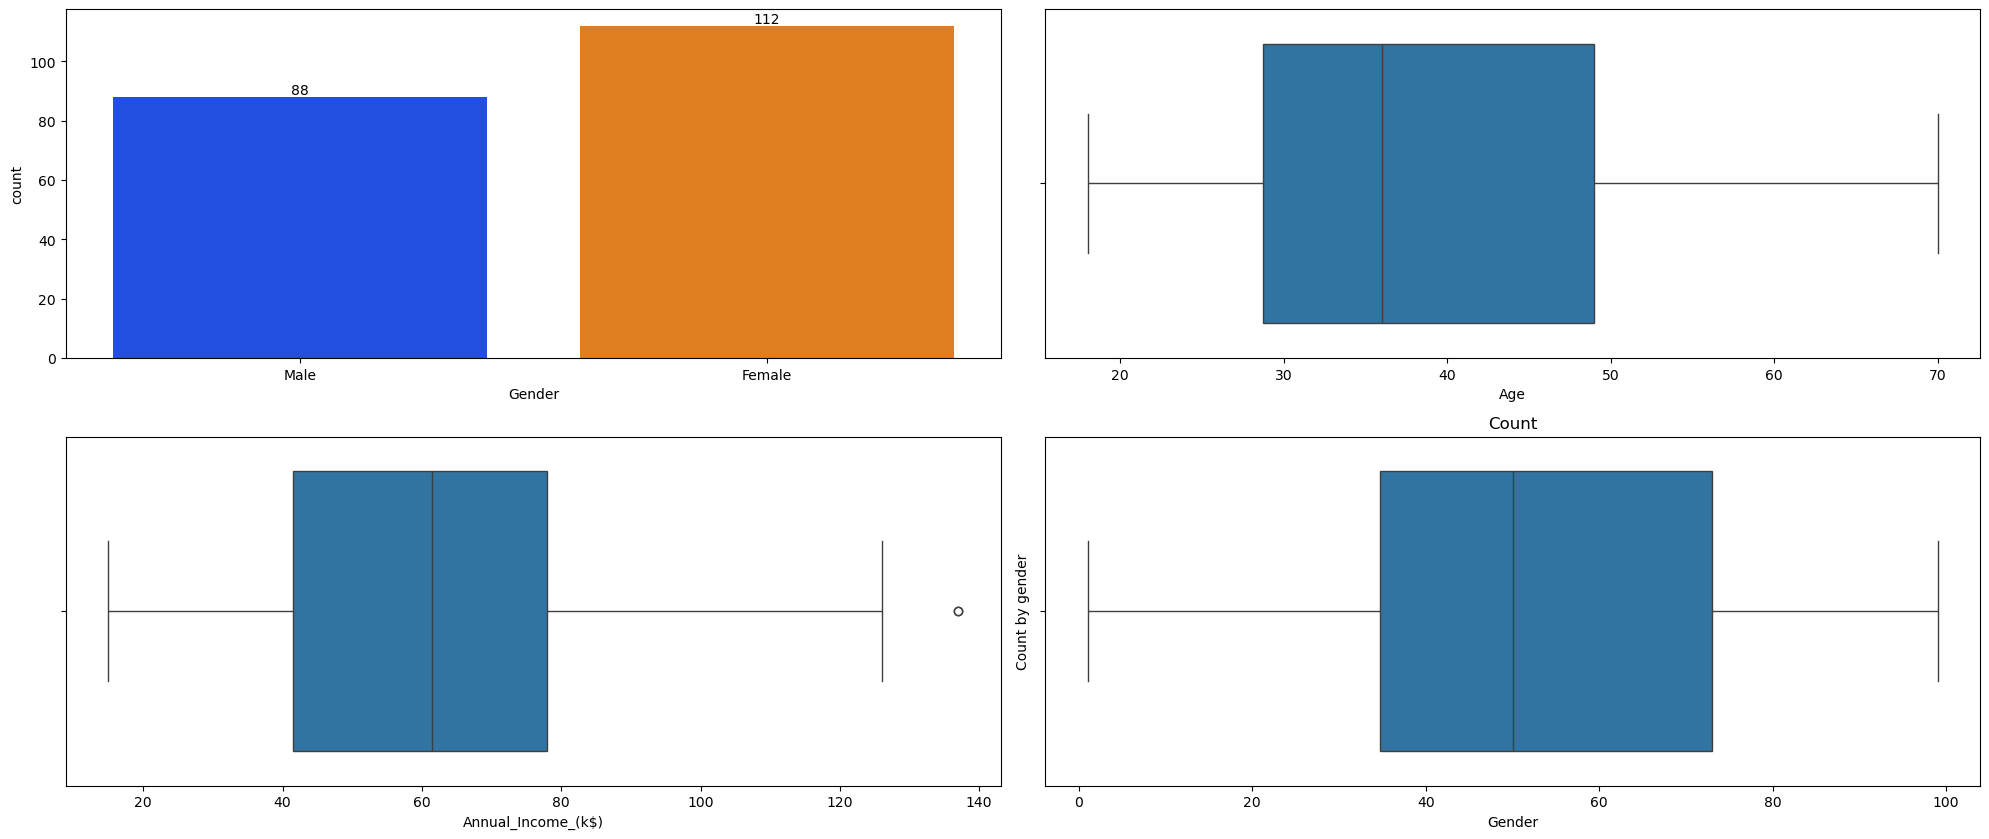

In [15]:
fig, axs = plt.subplots(2,2, figsize=(20,8.5))
plt1 = sns.countplot(x=data['Gender'], palette='bright', ax= axs[0,0])
for container in plt1.containers:
    plt1.bar_label(container, label_type='edge')
plt.xlabel('Gender')
plt.ylabel('Count by gender')
plt.title('Count');
plt2 = sns.boxplot(x=data['Age'], ax= axs[0,1])
plt3 = sns.boxplot(x=data['Annual_Income_(k$)'], ax= axs[1,0])
plt4 = sns.boxplot(x=data['Spending_Score'], ax= axs[1,1])

plt.tight_layout()

# BIVARIATE ANALYSIS

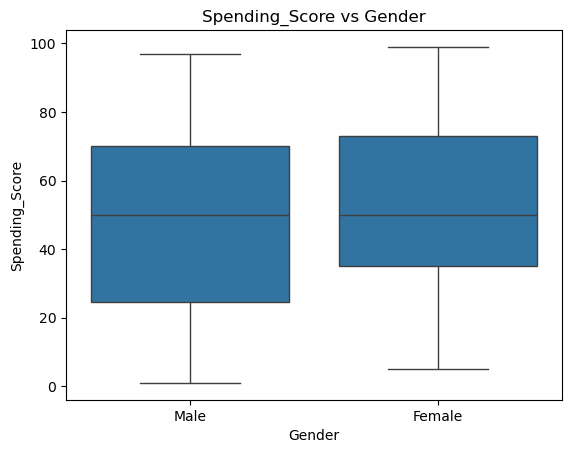

In [17]:
# Age vs Diabetes
sns.boxplot(x='Gender', y='Spending_Score', data=data)
plt.title('Spending_Score vs Gender')
plt.show()

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

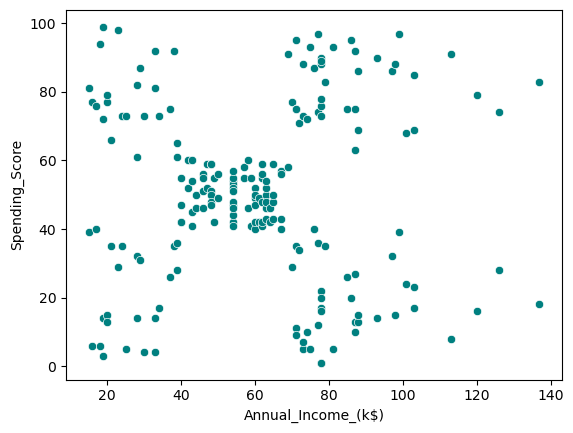

In [18]:
sns.scatterplot(x="Annual_Income_(k$)", y="Spending_Score", data=data, color="teal")

# MULTIVARIATE ANALYSIS

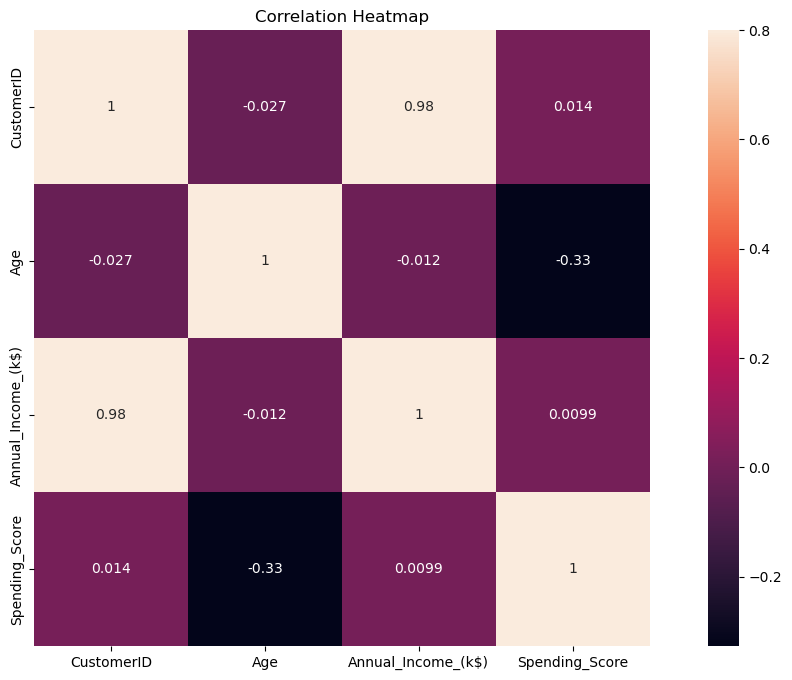

In [20]:
numeric_data = data.select_dtypes(include=[float, int])
a = numeric_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(a, vmax=0.8, square=True, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# MODEL BUILDING

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for c in data.columns[1:]:
    if(data[c].dtype == 'object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c]=data[c]
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
data.drop('CustomerID', axis=1, inplace=True)

In [24]:
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


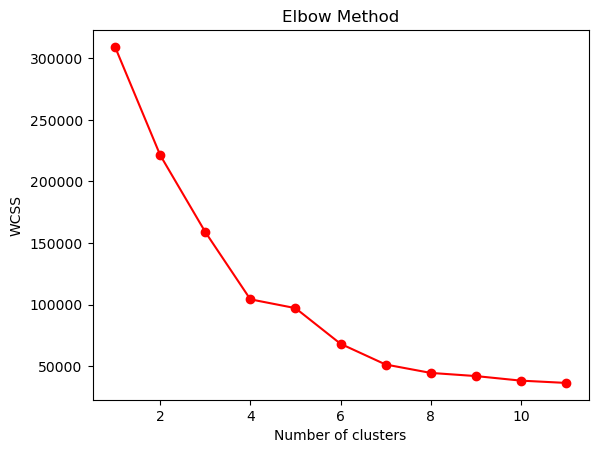

In [75]:
wcss = []

# Calculate the within-cluster sum of squares for different numbers of clusters
for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12), wcss, color='red', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data)

data['cluster']= kmeans.labels_

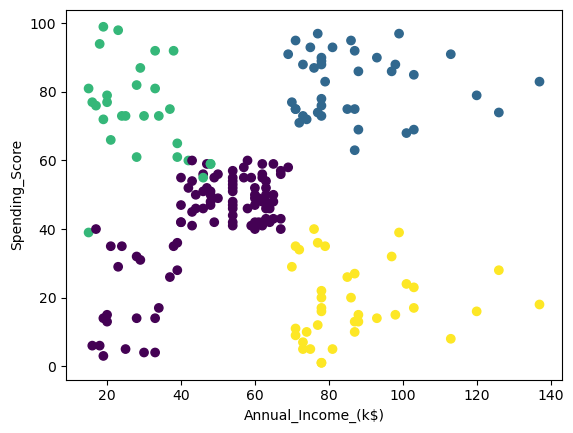

0.4061130710962918

In [79]:
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['cluster'], label='centroids')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()


silhouette_score(data, kmeans.labels_)